## Creating celeb-image-data dataframe

Create dataframe to record the following characteristics for each picture:

1. Celebrity folder (ex: Pedro Pascal)
2. Photo Number (ex: 08)
3. Link to location in repo (ex: /celebrities/Pedro-Pascal/08.jpg)
4. Gender of individual in photo (ex: Male)
5. Brightness of photo (ex: 97.4595) SOURCE: https://stackoverflow.com/questions/3490727/what-are-some-methods-to-analyze-image-brightness-using-python
6. Image resolution (ex: 50x50) https://www.geeksforgeeks.org/finding-the-size-resolution-of-image-in-python/
7. Race of individual photographed
8. Saturation of image: https://stackoverflow.com/questions/58831690/how-to-measure-the-saturation-of-an-image

## Before running the code, install the following libraries:

pip install pandas

pip install pillow

pip install numpy

pip install imutils

pip install opencv-python

In [ ]:
import pandas as pd
from PIL import Image, ImageStat
import os
import numpy as np

source_dir = "/workspace/DS4002Project3/DATA/celebrities" # set source directory

# Calculate the brightness of an image

# make a function that will calculate the average brightness of an image
def brightness(im_file):
    im = Image.open(im_file).convert('L')  # Convert to grayscale
    stat = ImageStat.Stat(im)
    return stat.mean[0]  # Mean brightness

# make a function that will take the filename of an image (01-100) and convert to integer
def extract_number_from_filename(filename):
    # Split at the dot and take the part before it
    number_str = filename.split('.')[0]
    # Convert the resulting string to an integer
    return int(number_str)

# make a function to list the race of the celebrity photographed
def get_race(celebrity_name):
    if celebrity_name == "Angelina-Jolie":
        return "White"
    elif celebrity_name == "America-Ferrera":
        return "White-Latina"
    elif celebrity_name == "Ayo-Edebiri":
        return "Black"
    elif celebrity_name == "Conan-OBrien":
        return "White"
    elif celebrity_name == "Danny-Pudi":
        return "Asian"
    elif celebrity_name == "David-Bowie":
        return "White"
    elif celebrity_name == "Donald-Glover":
        return "Black"
    elif celebrity_name == "Elizabeth-Olsen":
        return "White"
    elif celebrity_name == "Jackie-Chan":
        return "Asian"
    elif celebrity_name == "Jim-Carrey":
        return "White"
    elif celebrity_name == "John-Lennon":
        return "White"
    elif celebrity_name == "John-Mulaney":
        return "White"
    elif celebrity_name == "Lucy-Liu":
        return "Asian"
    elif celebrity_name == "Margot-Robbie":
        return "White"
    elif celebrity_name == "Mariah-Carey":
        return "Black-White"
    elif celebrity_name == "Matt-Damon":
        return "White"
    elif celebrity_name == "Maya-Rudolph":
        return "Black-White"
    elif celebrity_name == "Morgan-Freeman":
        return "Black"
    elif celebrity_name == "Olivia-Rodrigo":
        return "Asian-White"
    elif celebrity_name == "Pedro-Pascal":
        return "White"
    elif celebrity_name == "Priyanka-Chopra":
        return "Asian"
    elif celebrity_name == "Ryan-Gosling":
        return "White"
    elif celebrity_name == "SZA":
        return "Black"
    elif celebrity_name == "Salma-Hayek":
        return "White-Latina"
    elif celebrity_name == "Will-Smith":
        return "Black"
    else:
        return "Unknown"

from PIL import Image

# make a function that states the resolution of a photo
def get_resolution(img_path):
    try:
        with Image.open(img_path) as img:
            wid, hgt = img.size
            resolution = f"{wid}x{hgt}"
            return resolution
    except Exception as e:
        return None

# function to calculate saturation. --> adopted from https://pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/
from imutils import build_montages
from imutils import paths
import argparse
import imutils
import cv2

# Create a DataFrame including brightness information
import os

# now, define a function which applies the previous function to create a dataframe from image data.
def create_image_dataframe_from_source():
    data = []

    # Process each celebrity folder in the source directory
    for celeb_folder in os.listdir(source_dir):
        celeb_path = os.path.join(source_dir, celeb_folder)

        if os.path.isdir(celeb_path):
            for i, img_name in enumerate(os.listdir(celeb_path), start=1):
                # Construct the complete file path
                img_path = os.path.abspath(os.path.join(celeb_path, img_name))

                # Calculate brightness for the image
                img_brightness = brightness(img_path)

                # Calculate resolution for the image
                img_resolution = get_resolution(img_path)

                # Append the data to the list
                data.append({
                    'celebrity_name': celeb_folder,
                    'picture_number': extract_number_from_filename(img_name),
                    'file_path': img_path,  # Save the complete file path
                    'brightness': img_brightness,
                    'resolution': img_resolution
                })

    # Create DataFrame -- first add original columns
    df = pd.DataFrame(data, columns=['celebrity_name', 'picture_number', 'file_path', 'brightness', 'resolution'])
    # add race column
    df['race'] = df['celebrity_name'].apply(get_race)
    return df

# create the datframe using the previous function
df = create_image_dataframe_from_source()
# Sort by celebrity_name and then by picture_number
df = df.sort_values(by=['celebrity_name', 'picture_number'], ascending=[True, True])
# Reset index if needed
df = df.reset_index(drop=True)

# add gender column:
def gender_specification(dataframe):
    # Create a new column "gender" and assign values based on celebrity_name
    df['gender'] = df['celebrity_name'].apply(
        lambda name: 'female' if name in ['Angelina-Jolie', 'America-Ferrera', 'Ayo-Edebiri', 'Elizabeth-Olsen', 'Lucy-Liu', 'Margot-Robbie', 'Mariah-Carrie', 'Olivia-Rodrigo', 'Salma-Hayek', 'SZA']
        else 'male' if name in ['Conan-OBrien', 'Danny-Pudi', 'David-Bowie', 'Donald-Glover', 'Jackie-Chan', 'Jim-Carrey', 'John-Lennon', 'John-Mulaney', 'Matt-Damon', 'Morgan-Freeman', 'Pedro-Pascal', 'Ryan-Gosling', 'Will-Smith']
        else None
    )
    return df

# using this function, add the gender column to the df
gender_specification(df)

# add saturation column using a new function
import cv2

def image_colorfulness(image):
    # Split the image into its respective RGB components
    (B, G, R) = cv2.split(image.astype("float"))

    # Compute rg = R - G
    rg = np.absolute(R - G)

    # Compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)

    # Compute the mean and standard deviation of both `rg` and `yb`
    (rgMean, rgStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))

    # Combine the mean and standard deviations
    stdRoot = np.sqrt((rgStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rgMean ** 2) + (ybMean ** 2))

    # Derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

# List to hold colorfulness values
colorfulness_values = []

# Loop through each file path in the DataFrame
for filepath in df['file_path']:
    # Load the image
    image = cv2.imread(filepath)

    # Check if the image was loaded correctly
    if image is not None:
        # Calculate the colorfulness
        colorfulness_value = image_colorfulness(image)
    else:
        print(f"Warning: Could not load image at {filepath}")
        colorfulness_value = None  # Use None for missing images

    # Append the colorfulness value
    colorfulness_values.append(colorfulness_value)

# Add the colorfulness values as a new column in the DataFrame
df['colorfulness'] = colorfulness_values

# save the df to a file in the data folder
df.to_csv('/workspace/DS4002Project3/DATA/celeb_image_data.csv', index=False)

## Performing EDA

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

df = pd.read_csv( "/workspace/DS4002Project3/DATA/celeb_image_data.csv" )

### First, we will create bar graphs to count the number of celebrities in the dataset by race and gender.

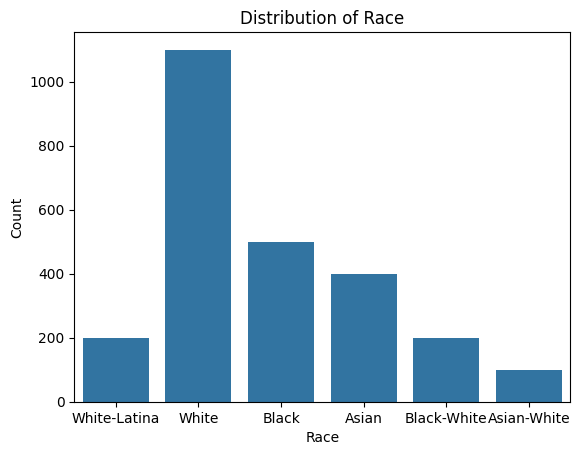

In [ ]:
# create a bar graph showing the races of our celebs. This will be used later in our analysis when we see if our model
# disproportionately misidentifies celebs based on gender or race.

import matplotlib as plt

url = 'https://raw.githubusercontent.com/oak50/DS4002Project3/main/DATA/celeb_image_data.csv'
df = pd.read_csv(url)

sns.countplot(x='race', data=df)
plt.pyplot.xlabel('Race')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Distribution of Race')
plt.pyplot.show()

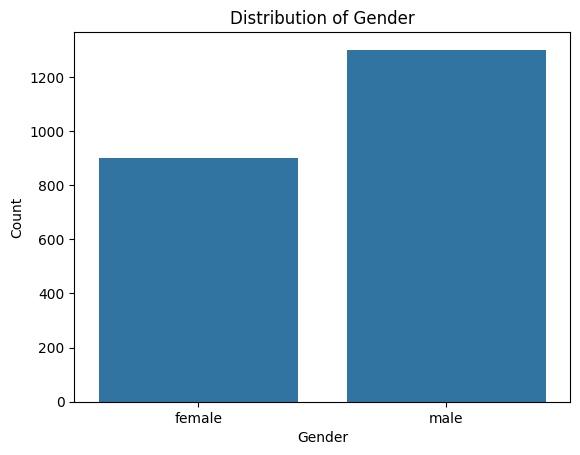

In [ ]:
# Do the same for gender

# gender bar graph:
sns.countplot(x='gender', data=df)
plt.pyplot.xlabel('Gender')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Distribution of Gender')
plt.pyplot.show()

### Now, we want to show the distribution of values for our quantitative variables: brightness, colorfullness, and resolution. We will create a KDE plot, a boxplot, and a histogram.

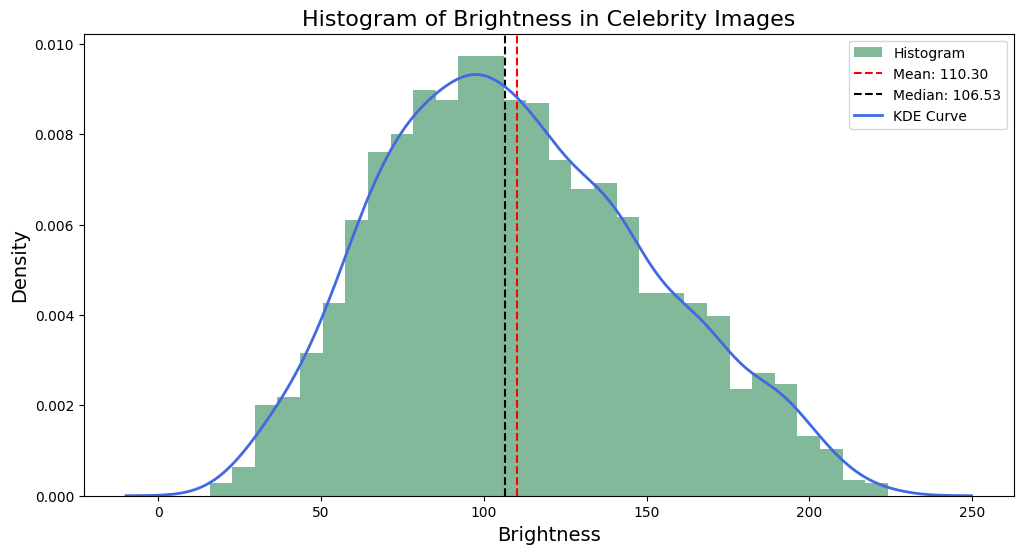

In [ ]:
# kde plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/oak50/DS4002Project3/main/DATA/celeb_image_data.csv'
df = pd.read_csv(url)

plt.figure(figsize=(12, 6))
plt.hist(df['brightness'], bins=30, color='seagreen', alpha=0.6, density=True, label='Histogram')

mean_value = df['brightness'].mean()
median_value = df['brightness'].median()

plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='black', linestyle='--', label=f'Median: {median_value:.2f}')

sns.kdeplot(df['brightness'], color='royalblue', label='KDE Curve', linewidth=2)

plt.title('Histogram of Brightness in Celebrity Images', fontsize=16)
plt.xlabel('Brightness', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(False)

plt.show()

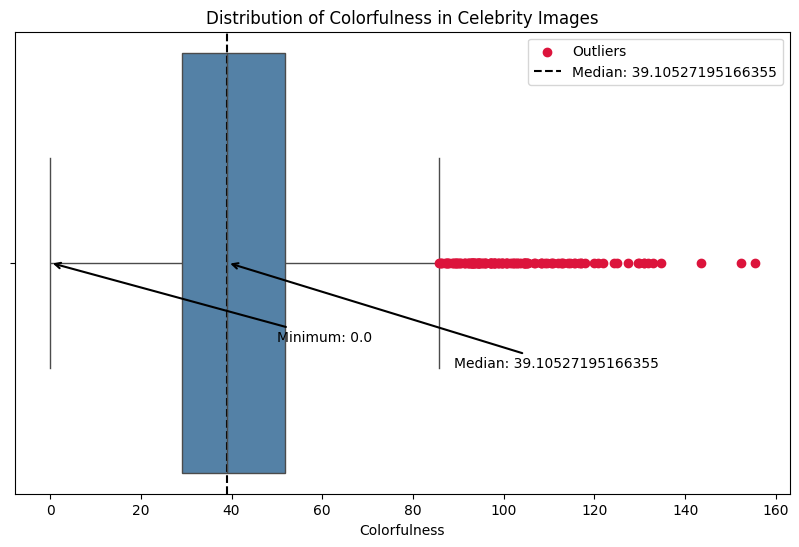

In [ ]:
# boxplot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://raw.githubusercontent.com/oak50/DS4002Project3/main/DATA/celeb_image_data.csv'
df = pd.read_csv(url)

plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=df['colorfulness'], color='steelblue', showfliers=False)

# calculate IQR, lower and upper bounds to detect for outliers in data
Q1 = df['colorfulness'].quantile(0.25)
Q3 = df['colorfulness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['colorfulness'] < lower_bound) | (df['colorfulness'] > upper_bound)]

plt.scatter(outliers['colorfulness'], [0] * len(outliers), color='crimson', zorder=3, label='Outliers')

# retrieve median and minimum values of colorfulness to display on plot
median = df['colorfulness'].median()
minimum = df['colorfulness'].min()

plt.axvline(median, color='black', linestyle='--', label=f'Median: {median}')
plt.annotate(f'Median: {median}', xy=(median, 0), xytext=(median + 50, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))

plt.annotate(f'Minimum: {minimum}', xy=(minimum, 0), xytext=(minimum + 50, 0.15),
             arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5))

plt.title('Distribution of Colorfulness in Celebrity Images')
plt.xlabel('Colorfulness')
plt.legend()

plt.show()

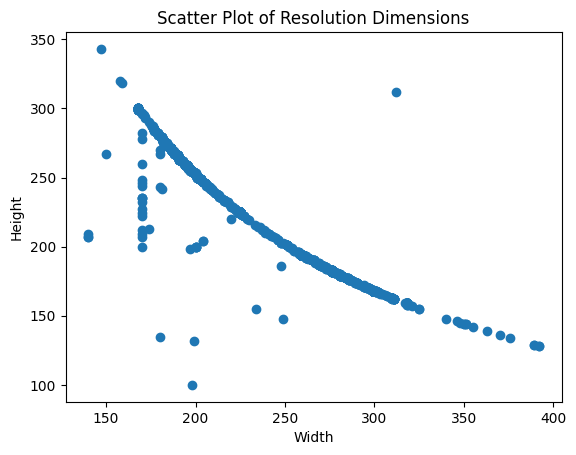

In [ ]:
# scatterplot of resolution dimensions

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/oak50/DS4002Project3/main/DATA/celeb_image_data.csv'
df = pd.read_csv(url)

# split the resolution column into two new columns 'x' and 'y' by the x in the cell
df[['x', 'y']] = df['resolution'].str.split('x', expand=True)

# convert the new columns to integer values
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])

plt.scatter(df['x'], df['y'])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Resolution Dimensions')
plt.show()
